In [1]:
# Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from scipy import stats
from scipy import mean

# Reflect Tables into SQLAlchemy ORM and Inspect and Query Database

In [5]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
# Create Engine

engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()

In [7]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Use Inspector to print the column names and types

columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Use Inspector to print the column names and types

columns = inspector.get_columns('station')
for s in columns:
    print(s['name'], s["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Reflect Database in ORM classes for Stations

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [11]:
# Query Database to view Station data 

stationdata = engine.execute ('Select *From station').fetchall()

stationdata 

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# Query Database to view Measurement data 

measurementdata = engine.execute ('Select *From measurement').fetchall()

measurementdata [:10]

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
# Station and Measurment data 

engine.execute('SELECT * FROM Measurement, Station').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (1, 'USC00519397', '2010-01-01', 0.08, 65.0, 8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (1, 'USC00519397', '2

In [14]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# To view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table : Station 
Station = Base.classes.station
Measurement = Base.classes.measurement


In [17]:
# Create our session (link) from Python to the DB
session = Session (engine)


# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data # NOTE ENGINE CAN USE WHERE CONN 
#df = pd.read_sql('''SELECT * FROM hawii'', conn)

In [19]:
# Design a query to retrieve precipitation data 

precipidata = session.query (Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs)\
.group_by(Measurement.prcp)\
.order_by(Measurement.date).all()

precipidata [:10]

[('2010-01-01', 0.08, 'USC00519397', 65.0),
 ('2010-01-02', 0.0, 'USC00519397', 63.0),
 ('2010-01-06', None, 'USC00519397', 73.0),
 ('2010-01-07', 0.06, 'USC00519397', 70.0),
 ('2010-01-11', 0.01, 'USC00519397', 64.0),
 ('2010-01-26', 0.04, 'USC00519397', 76.0),
 ('2010-01-27', 0.12, 'USC00519397', 68.0),
 ('2010-01-30', 1.7, 'USC00513117', 69.0),
 ('2010-01-30', 2.17, 'USC00519281', 69.0),
 ('2010-01-30', 2.75, 'USC00519523', 69.0)]

In [20]:
# Find the last date in the in the database

db_enddate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"Database Last date is: {db_enddate [0]}")


Database Last date is: 2017-08-23


In [21]:
# Calculate the date 1 year ago from the last data point in the database

yeardatefromdb_enddate = (dt.datetime.strptime(db_enddate[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')

print(f"Date one year ago from Database Last date is: {yeardatefromdb_enddate}")


Date one year ago from Database Last date is: 2016-08-23


In [22]:
# Select the data and prcp values for the last 12 months

precipidata_last12mths = session.query (Measurement.date, Measurement.prcp).\
filter(Measurement.date >=yeardatefromdb_enddate).all()
                                                                                            
precipidata_last12mths [:10]


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Drop none to clean data

precipida_df = pd.DataFrame(precipidata_last12mths, columns=['date', 'precipitation'])
precipida_df = precipida_df.dropna()


precipida_df.head(10)

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [24]:
# set the index to the date column and sort

precipida_df = precipida_df.set_index('date')
precipida_df = precipida_df.sort_values('date')

precipida_df.head(10)


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


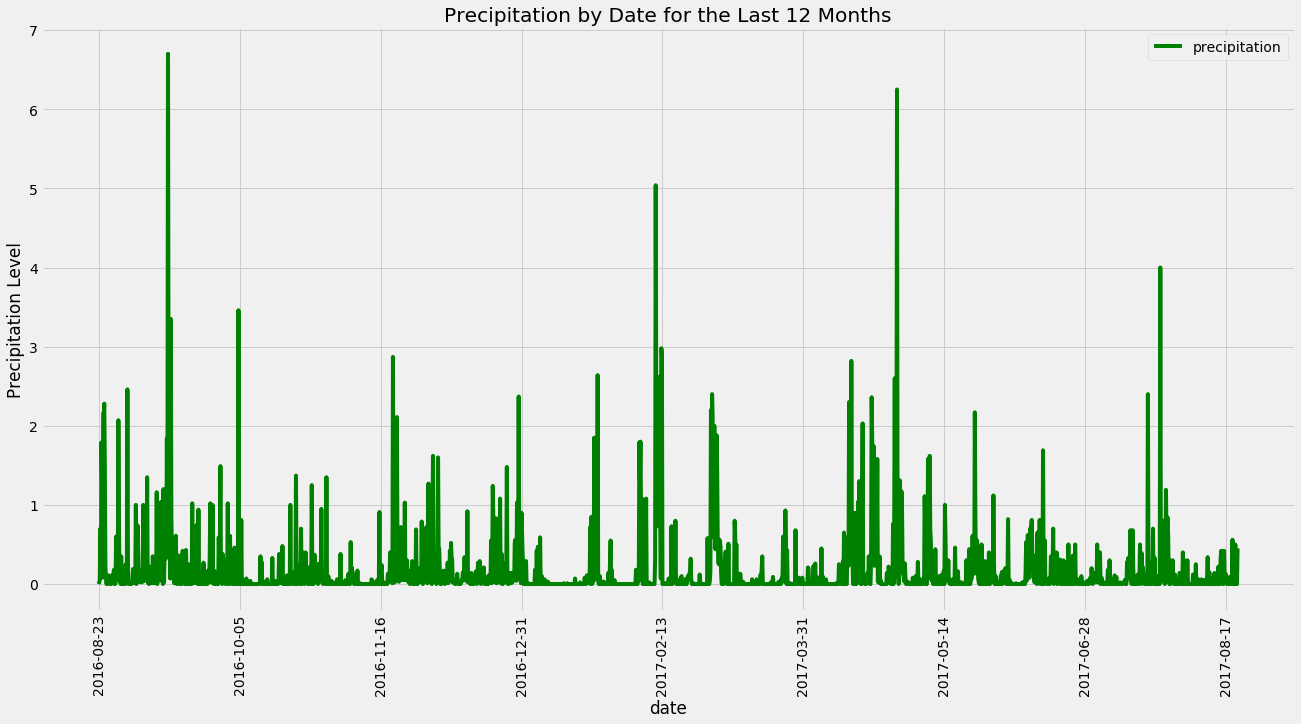

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data

plot = precipida_df.plot(rot=90, color="g", figsize=(20,10))
plot.set_title("Precipitation by Date for the Last 12 Months")
plot.set_ylabel("Precipitation Level")

#Save image
plt.savefig("./images/precipitation")

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data

stat_data = precipida_df.describe()

stat_data

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to show how many stations are available in this dataset?

stations_avail = session.query(Station.name, Station.station).count()

stations_avail


9

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
    
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
                                
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

active_station_temps = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

active_station_temps


[(54.0, 85.0, 71.66378066378067)]

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Station_mosttemps =  session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date > yeardatefromdb_enddate).\
                    order_by(Measurement.date.asc()).all()

Station_mosttemps [:10]


[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0)]

<Figure size 1440x720 with 0 Axes>

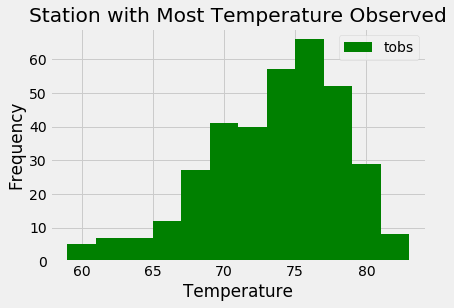

In [31]:
# Set Dataframe to plot the results as a histogram

Station_mosttemps = pd.DataFrame(Station_mosttemps) 
    
# Plot Histogram  with temperatures

plt.figure(figsize=(20,10))
Station_mosttemps.plot(kind = "hist", bins =12, density=False, label="Temperature (F)", color="g")

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.title("Station with Most Temperature Observed")


# Save image

plt.savefig("./images/Station with Most Temparature Observed")


## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Getting June Temperature for all stations

june_temps = session.query(Measurement.date, Measurement.tobs, Measurement.station)\
.filter(func.strftime("%m",Measurement.date) == '06').group_by(Measurement.tobs).all()

june_temps

[('2016-06-01', 64.0, 'USC00517948'),
 ('2011-06-03', 65.0, 'USC00517948'),
 ('2013-06-27', 66.0, 'USC00511918'),
 ('2011-06-03', 67.0, 'USC00514830'),
 ('2016-06-04', 68.0, 'USC00513117'),
 ('2011-06-04', 69.0, 'USC00513117'),
 ('2011-06-04', 70.0, 'USC00519397'),
 ('2016-06-02', 71.0, 'USC00519397'),
 ('2010-06-26', 72.0, 'USC00513117'),
 ('2011-06-03', 73.0, 'USC00519397'),
 ('2013-06-25', 74.0, 'USC00519397'),
 ('2011-06-19', 75.0, 'USC00519397'),
 ('2010-06-02', 76.0, 'USC00519397'),
 ('2010-06-05', 77.0, 'USC00519397'),
 ('2010-06-01', 78.0, 'USC00519397'),
 ('2010-06-10', 79.0, 'USC00519397'),
 ('2014-06-12', 80.0, 'USC00519397'),
 ('2015-06-27', 81.0, 'USC00519397'),
 ('2010-06-19', 82.0, 'USC00519397'),
 ('2017-06-12', 83.0, 'USC00519397'),
 ('2014-06-24', 84.0, 'USC00519397'),
 ('2010-06-20', 85.0, 'USC00511918')]

In [34]:
# Getting December Temperature for all stations

december_temps = session.query(Measurement.date, Measurement.tobs, Measurement.station)\
.filter(func.strftime("%m",Measurement.date) == '12').group_by(Measurement.tobs).all()

december_temps

[('2014-12-31', 56.0, 'USC00519397'),
 ('2014-12-29', 57.0, 'USC00511918'),
 ('2010-12-07', 58.0, 'USC00519281'),
 ('2014-12-31', 59.0, 'USC00519281'),
 ('2010-12-08', 60.0, 'USC00519281'),
 ('2014-12-25', 61.0, 'USC00519397'),
 ('2016-12-16', 62.0, 'USC00519397'),
 ('2011-12-31', 63.0, 'USC00519397'),
 ('2010-12-06', 64.0, 'USC00519397'),
 ('2012-12-01', 65.0, 'USC00519397'),
 ('2010-12-10', 66.0, 'USC00519397'),
 ('2010-12-08', 67.0, 'USC00519397'),
 ('2010-12-12', 68.0, 'USC00519397'),
 ('2010-12-11', 69.0, 'USC00519397'),
 ('2010-12-23', 70.0, 'USC00519397'),
 ('2010-12-14', 71.0, 'USC00519397'),
 ('2010-12-31', 72.0, 'USC00519397'),
 ('2011-12-03', 73.0, 'USC00519397'),
 ('2010-12-03', 74.0, 'USC00519397'),
 ('2010-12-29', 75.0, 'USC00519397'),
 ('2010-12-01', 76.0, 'USC00519397'),
 ('2010-12-09', 77.0, 'USC00519397'),
 ('2010-12-14', 78.0, 'USC00513117'),
 ('2012-12-03', 79.0, 'USC00514830'),
 ('2015-12-04', 80.0, 'USC00513117'),
 ('2015-12-04', 81.0, 'USC00517948'),
 ('2015-12-1

In [35]:
# Make DataFrames and then concatenate into one DataFrame to find averages

june_df = pd.DataFrame(june_temps,columns=["Date","Temperature", "Station"])
december_df = pd.DataFrame(december_temps, columns=["Date","Temperature","Station"])

june_df["Month"] = "June"
december_df["Month"] = "December"

temp_df = pd.concat([june_df,december_df])

# calculate the average for both June and December

avg_temp_month = temp_df.groupby("Month").mean()

avg_temp_month


,Temperature
Month,
December,69.5
June,74.5


In [36]:
# Testing if the means are statistically significantly
#The unpaired t-test is used to determine if the average temperatures between June and December are statistically 
# significantly different because means are from separate months therefore are independent on each other

stats.ttest_ind(june_df["Temperature"], december_df["Temperature"])

Ttest_indResult(statistic=2.334592594146816, pvalue=0.0237956066675986)

In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-12-28', '2017-01-05'))

[(62.0, 69.27272727272727, 77.0)]


In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

start_date = '2016-06-28'
end_date = '2016-07-05'

vacation_dates = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Load the results into a pandas dataframe.

vacation_temps = pd.DataFrame(vacation_dates, columns=['Date', 'Temperature'])

vacation_temps.head()


,Date,Temperature
0,2016-06-28,76.0
1,2016-06-29,79.0
2,2016-06-30,80.0
3,2016-07-01,79.0
4,2016-07-02,79.0


In [39]:
# Average temperature

avg_vacation_temps = vacation_temps.mean()
avg_vacation_temps


Temperature    77.212766
dtype: float64

In [40]:
# Minimum temperature

minvacation_temps =vacation_temps.min()

minvacation_temps

Date           2016-06-28
Temperature            71
dtype: object

In [41]:
# Maximum temperature

maxvacation_temps =vacation_temps.max()

maxvacation_temps

Date           2016-07-05
Temperature            82
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

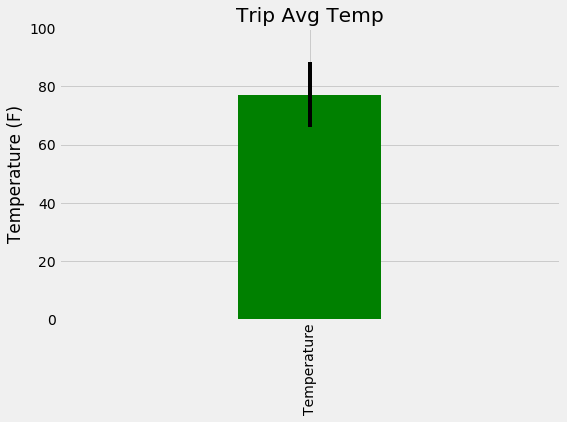

In [42]:
# Plot the results a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_vacation_temps = vacation_temps.mean()

temp_diff = (vacation_temps["Temperature"].max()-vacation_temps["Temperature"].min())

tripplot = avg_vacation_temps.plot(kind="bar", color="g", yerr=temp_diff, width=0.2, figsize=(8,5),legend=False)
tripplot.set_title("Trip Avg Temp")
tripplot.set_ylabel("Temperature (F)")
tripplot.set_ylim(0,100)

# Save image

plt.savefig('./images/Trip Avg Temp')

plt.show

In [43]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_data = [Station.station, Station.name, func.sum(Measurement.tobs), Station.latitude, Station.longitude, Station.elevation]

previous_year =    session.query(*rainfall_data).\
                    group_by(Measurement.station).\
                    outerjoin(Station, Measurement.station==Station.station).\
                    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                    order_by(func.sum(Measurement.tobs).desc()).all()
previous_year

[('USC00519397', 'WAIKIKI 717.2, HI US', 627.0, 21.2716, -157.8168, 3.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  609.0,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 609.0, 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  552.0,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  471.0,
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 396.0, 21.3934, -157.9751, 11.9),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  365.0,
  21.3331,
  -157.8025,
  152.4)]

In [44]:
#Using a Dataframe to display results
#Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

pd.DataFrame(previous_year,
             columns=["Station_iD","Station_Name", "Total_Rainfall", "Latitude", "Longitude", "Elevation"]
            ).sort_values("Total_Rainfall",ascending=False)


,Station_iD,Station_Name,Total_Rainfall,Latitude,Longitude,Elevation
0,USC00519397,"WAIKIKI 717.2, HI US",627.0,21.27160,-157.81680,3.0
1,USC00519281,"WAIHEE 837.5, HI US",609.0,21.45167,-157.84889,32.9
2,USC00513117,"KANEOHE 838.1, HI US",609.0,21.42340,-157.80150,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",552.0,21.33556,-157.71139,19.5
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",471.0,21.52130,-157.83740,7.0
5,USC00517948,"PEARL CITY, HI US",396.0,21.39340,-157.97510,11.9
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",365.0,21.33310,-157.80250,152.4


In [45]:
# Calculate the daily normals for your trip
# Push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [46]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [47]:
# Calculate the daily normals for your trip
# Push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
print(f'The trip dates are {start_date} to {end_date}')

The trip dates are 2016-06-28 to 2016-07-05


In [48]:
# # Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

startofvac = dt.datetime.strptime(start_date,'%Y-%m-%d')
endofvac = dt.datetime.strptime(end_date,'%Y-%m-%d') 
delta = endofvac -startofvac
normals = []

for i in range(delta.days + 1):
    day = startofvac + dt.timedelta(days=i)
    # Strip off the year and save a list of %m-%d strings
    month_day = dt.datetime.strftime(day,'%m-%d')
    normals.append(month_day)
    
normals

['06-28', '06-29', '06-30', '07-01', '07-02', '07-03', '07-04', '07-05']

In [49]:
# Loop through the list of %m-%d strings and calculate the normals for each date

normal_list = []
for day in normals:
    normal_list.append(daily_normals(day)[0])
    
normal_list

[(69.0, 74.88679245283019, 80.0),
 (67.0, 74.91525423728814, 80.0),
 (67.0, 75.59615384615384, 81.0),
 (67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0)]

In [50]:
 # Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
    
normals_df = pd.DataFrame(normal_list,columns=["tmin","tavg","tmax"],index=[normals])
normals_df.index = normals_df.index.get_level_values(0)

normals_df

,tmin,tavg,tmax
06-28,69.0,74.886792,80.0
06-29,67.0,74.915254,80.0
06-30,67.0,75.596154,81.0
07-01,67.0,74.777778,81.0
07-02,68.0,75.403846,82.0
07-03,68.0,75.320755,87.0
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0


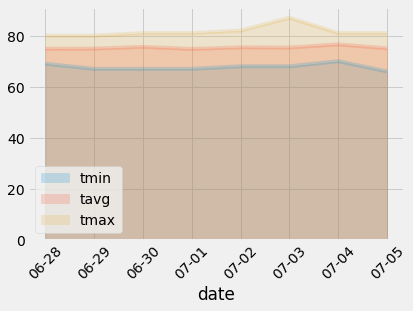

In [51]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot(kind="area",stacked=False,rot=45,alpha=.2);
plt.xlabel("date");


# Save image

plt.savefig('./images/Daily Normals')

plt.show()
